In [ ]:
# !pip install nltk

In [5]:
# !pip install wordcloud

In [6]:
import pandas as pd
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [8]:
# Download necessary NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

True

In [10]:
# Function to read gzipped CSV file
def read_gzipped_csv(file_path):
    with gzip.open(file_path, 'rt', encoding='utf-8') as f:
        return pd.read_csv(f)

# Load the reviews data
df_reviews = read_gzipped_csv('reviews.csv.gz')

# Display basic information about the dataset
print(df_reviews.info())

# Show the first few rows
# print(df_reviews.head())
df_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1906979 entries, 0 to 1906978
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   listing_id     int64 
 1   id             int64 
 2   date           object
 3   reviewer_id    int64 
 4   reviewer_name  object
 5   comments       object
dtypes: int64(3), object(3)
memory usage: 87.3+ MB
None


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3109,207127433,2017-10-28,51636494,Patricia,Tout s'est bien déroulé. Merci bien. PG
1,3109,208779822,2017-11-03,4142888,Patricia,Un petit nid fouiller douillet situé dans app...
2,3109,295840159,2018-07-24,7415343,Laurent,"Appartement spacieux, propre,clair, et calme à..."
3,3109,553502638,2019-10-24,21159216,Anastasia,"Appartement totalement rénové, en parfait état..."
4,5396,4824,2009-06-30,19995,Sarah,Perfect location!! Nasrine was a delight and m...


         listing_id            id                           date   reviewer_id
count  1.906979e+06  1.906979e+06                        1906979  1.906979e+06
mean   1.867505e+17  5.221996e+17  2021-04-20 23:09:33.565413376  1.489839e+08
min    3.109000e+03  4.824000e+03            2009-06-30 00:00:00  3.000000e+00
25%    1.058582e+07  4.299322e+08            2019-03-29 00:00:00  2.869470e+07
50%    2.819002e+07  6.324028e+17            2022-05-22 00:00:00  8.863208e+07
75%    5.272506e+07  9.361237e+17            2023-07-15 00:00:00  2.254705e+08
max    1.173867e+18  1.178193e+18            2024-06-13 00:00:00  5.828833e+08
std    3.504845e+17  4.486193e+17                            NaN  1.526813e+08


C:\Users\bbode\AppData\Local\Temp\ipykernel_1956\3321187497.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reviews_over_time = df_reviews.resample('M', on='date').size()


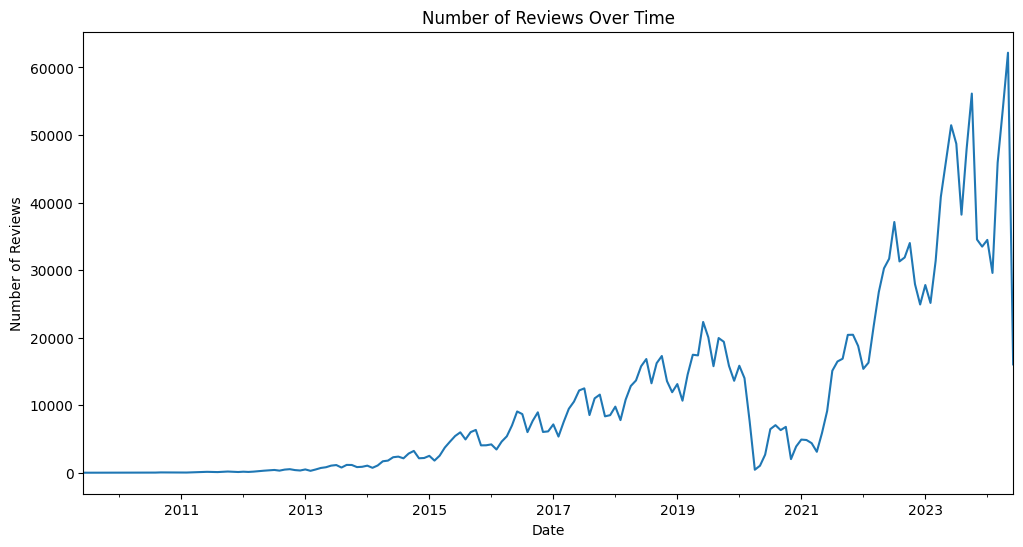

In [12]:
# Convert date to datetime
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

# Basic statistical summary
print(df_reviews.describe())

# Number of reviews over time
reviews_over_time = df_reviews.resample('M', on='date').size()

plt.figure(figsize=(12, 6))
reviews_over_time.plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

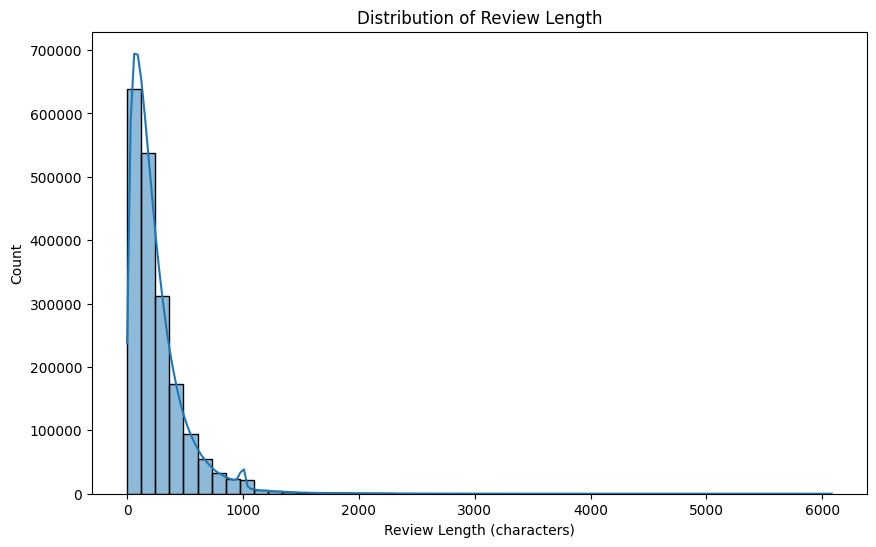

In [13]:

# Distribution of review length
df_reviews['review_length'] = df_reviews['comments'].str.len()

plt.figure(figsize=(10, 6))
sns.histplot(df_reviews['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Length')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.show()

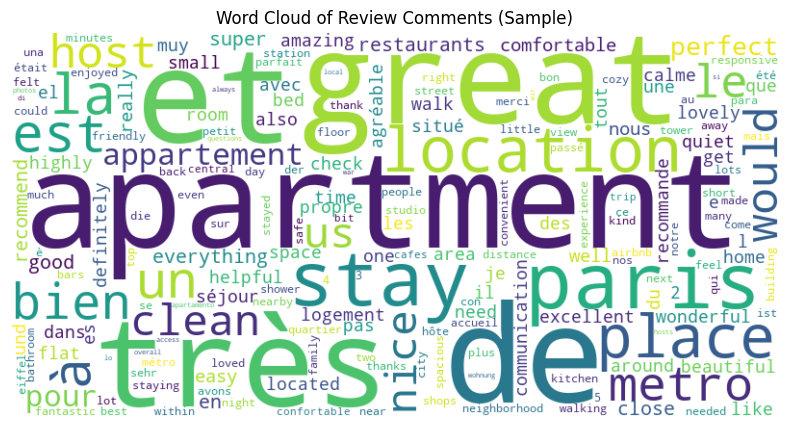

Word cloud generation completed.


In [19]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from collections import Counter

# Download necessary NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# Function to preprocess text
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text.lower())
        return " ".join([word for word in tokens if word.isalnum() and word not in stop_words])
    return ""

# Function to process reviews in chunks
def process_reviews_chunk(chunk):
    return ' '.join(chunk.apply(preprocess_text))

# Load the reviews data (adjust the chunk size as needed)
chunksize = 10000  # Adjust this value based on your available memory
word_freq = Counter()

for chunk in pd.read_csv('reviews.csv.gz', compression='gzip', chunksize=chunksize):
    # Process only the 'comments' column
    processed_chunk = process_reviews_chunk(chunk['comments'])
    word_freq.update(processed_chunk.split())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Comments (Sample)')
plt.show()

print("Word cloud generation completed.")


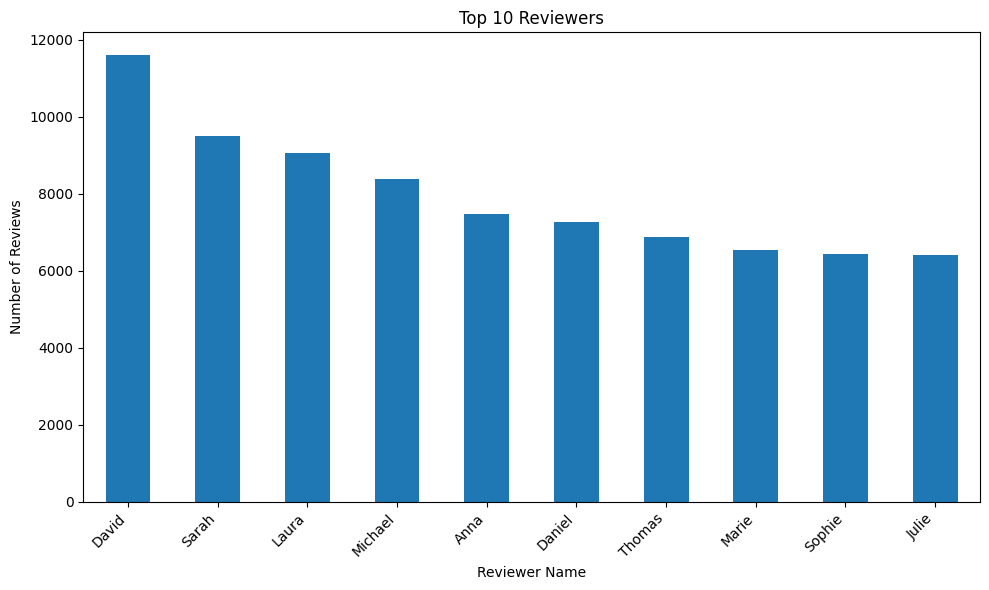

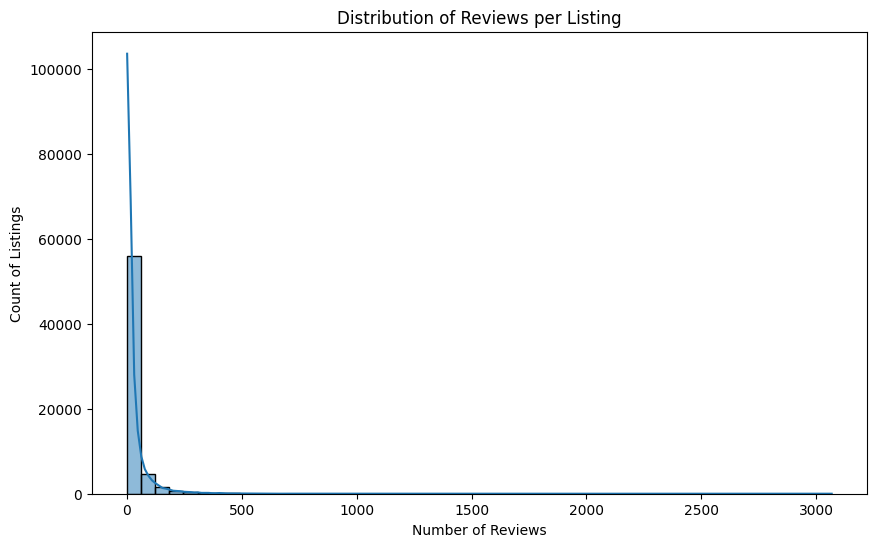

Analysis completed. Cleaned data saved as 'cleaned_reviews.csv'.
Visualizations have been displayed. Please close the plot windows to continue.

Total number of reviews: 1906979

Number of unique listings reviewed: 63697

Number of unique reviewers: 1689427

Date range of reviews: 2009-06-30 00:00:00 to 2024-06-13 00:00:00

Average review length: 257.3061400974063 characters


In [21]:
# Top reviewers
top_reviewers = df_reviews['reviewer_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_reviewers.plot(kind='bar')
plt.title('Top 10 Reviewers')
plt.xlabel('Reviewer Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Reviews per listing
reviews_per_listing = df_reviews['listing_id'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(reviews_per_listing, bins=50, kde=True)
plt.title('Distribution of Reviews per Listing')
plt.xlabel('Number of Reviews')
plt.ylabel('Count of Listings')
plt.show()

# Save cleaned data
df_reviews.to_csv('cleaned_reviews.csv', index=False)

print("Analysis completed. Cleaned data saved as 'cleaned_reviews.csv'.")
print("Visualizations have been displayed. Please close the plot windows to continue.")

# Additional analysis
print("\nTotal number of reviews:", len(df_reviews))
print("\nNumber of unique listings reviewed:", df_reviews['listing_id'].nunique())
print("\nNumber of unique reviewers:", df_reviews['reviewer_id'].nunique())
print("\nDate range of reviews:", df_reviews['date'].min(), "to", df_reviews['date'].max())
print("\nAverage review length:", df_reviews['review_length'].mean(), "characters")